In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
import os
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('two_dataset.csv')
df.head()
print(df.columns.tolist())

['X1', 'X2', 'X3', 'X4', 'y']


In [10]:
x = df[['X1', 'X2', 'X3', 'X4']].values.reshape(-1,4)
y = df['y'].values.reshape(-1,1)

sc = MinMaxScaler()
x = sc.fit_transform(x)

yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

jb.dump(sc, 'two_scaler.pkl')

['two_scaler.pkl']

In [13]:
def prob(a,b,c,d):
    model_path = 'two.keras'
    sc = jb.load('two_scaler.pkl')
    inp = np.array([[a,b,c,d]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='tanh'),
                                    keras.layers.Dense(16, activation='tanh'),
                                    keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate =0.001), loss='mean_squared_error')
        hist = model.fit(x, y, epochs=100)
        model.save('two.keras')
        lv = hist.history['loss']
        pred = model.predict(x)

        plt.figure() 
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx - yn)+yn

Epoch 1/100


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0175
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4700e-04
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8899e-04
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5096e-04
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1315e-04
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3130e-04
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4749e-04
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8860e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2174e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8383e-04
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9427e-04
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6185e-04
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8488e-04
Epoch 

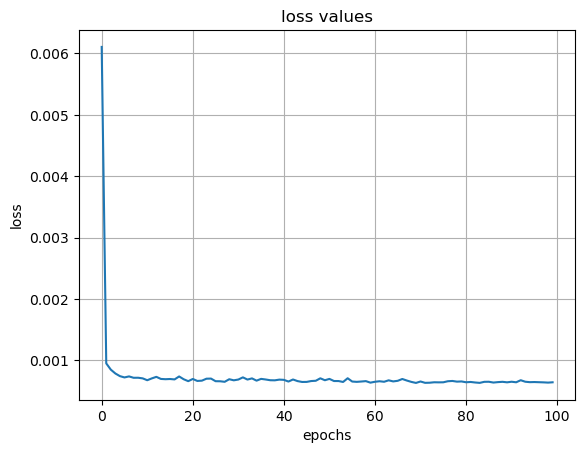

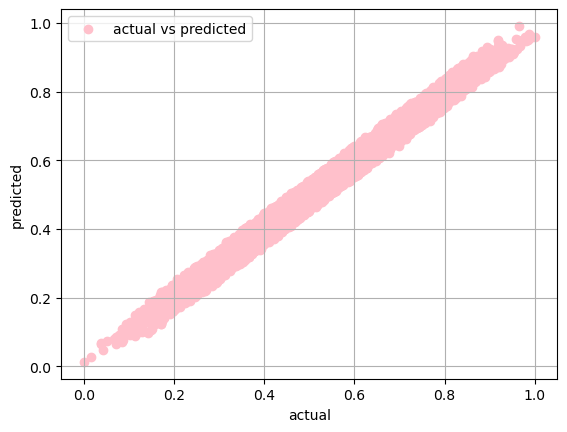

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
143.73361865309695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
187.74490963282997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
-16.58011273859927


In [14]:
print(prob(15,30,-5,-8))
print(prob(30,-2,12,10))
print(prob(-4,10,-5,-9))